In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [301]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'
SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
LICK_PATH = "/home/swei20/HL/dataset/Lick Indices.xlsx"
sys.path.insert(0, PROJECT_PATH)

In [470]:
with h5py.File(SZALAY_PATH, 'a') as f:
    f.create_dataset('wave', data = wave, shape = (15404,))  

In [ ]:
with h5py.File(SZALAY_PATH, 'r') as f:
    wave = f['wave'][()]

In [327]:
with h5py.File(PCA_PATH, 'r') as f:
#     flux = f['flux'][()]
#     flux_idx = f['flux_idx'][()]
    Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
#     wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]    

In [56]:
with h5py.File(NORM_PATH, 'r') as f:
#     flux = f['flux'][:,:,:,3,1,:]
#     flux_idx = f['flux_idx'][:,:,:,3,1,:]
    Fe_H = f['Fe_H'][()]
    log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
    wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]  

In [58]:
log_g

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [60]:
T_eff

array([ 3500.,  3750.,  4000.,  4250.,  4500.,  4750.,  5000.,  5250.,
        5500.,  5750.,  6000.,  6250.,  6500.,  6750.,  7000.,  7250.,
        7500.,  7750.,  8000.,  8250.,  8500.,  8750.,  9000.,  9250.,
        9500.,  9750., 10000., 10250., 10500., 10750., 11000., 11250.,
       11500., 11750., 12000., 12500., 13000., 13500., 14000., 14500.,
       15000., 15500., 16000., 16500., 17000., 17500., 18000., 18500.,
       19000., 19500., 20000., 21000., 22000., 23000., 24000., 25000.,
       26000., 27000., 28000., 29000., 30000., 31000., 32000., 33000.,
       34000., 35000.])

In [57]:
Fe_H

array([-2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 ,
       -0.25,  0.  ,  0.25,  0.5 ,  0.75])

In [21]:
df_para = pd.read_csv("/home/swei20/AE/data/para.csv")

In [26]:
df_para0 = df_para [(df_para["C_M"]==0.0) & (df_para["O_M"]==0)][['Fe', 'Te', 'Lg', 'FeH', 'Teff', 'Logg', 'p1',
       'p2', 'p3']]

In [27]:
df_para0.columns

Index(['Fe', 'Te', 'Lg', 'FeH', 'Teff', 'Logg', 'p1', 'p2', 'p3'], dtype='object')

In [28]:
df_para0

,Fe,Te,Lg,FeH,Teff,Logg,p1,p2,p3
9,0,0,0,-2.50,3500.0,0.0,-33.800363,2.131085,-5.416027
29,0,0,1,-2.50,3500.0,0.5,-40.023893,2.926853,-5.883087
49,0,0,2,-2.50,3500.0,1.0,-45.953753,3.805571,-7.035720
69,0,0,3,-2.50,3500.0,1.5,-45.529586,4.299167,-8.048748
85,0,0,4,-2.50,3500.0,2.0,-43.820162,4.573155,-8.223677
...,...,...,...,...,...,...,...,...,...
116526,13,60,6,0.75,30000.0,3.0,4.762276,0.634553,-1.736324
116543,13,60,7,0.75,30000.0,3.5,-2.134988,-2.545087,0.626786
116563,13,60,8,0.75,30000.0,4.0,-3.084944,-4.021800,0.970508
116583,13,60,9,0.75,30000.0,4.5,-3.481322,-4.756228,1.126319


In [704]:
from hl.lick import Fisher

Wave 4500-9500 (7472, ) | Flux (14, 66, 11, 7472) | Mask 3828


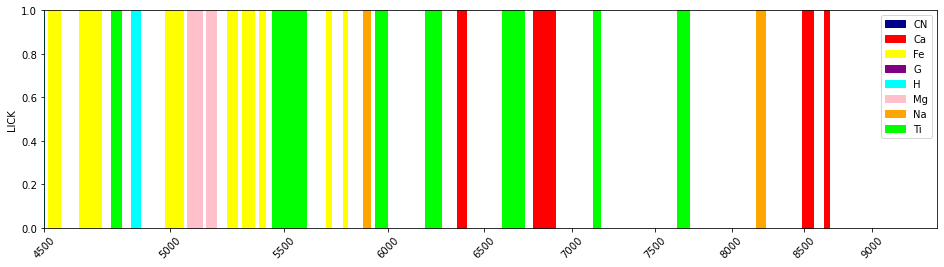

In [705]:
self =Fisher(wave, flux, flux_idx)

In [706]:
self.get_laplace()

In [708]:
self.get_lpLg()

In [691]:
self.get_lpFe()

1.265626089486192 3.306939335412592


/home/swei20/HL/nb/../hl/lick.py:107: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  
/home/swei20/HL/nb/../hl/lick.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  


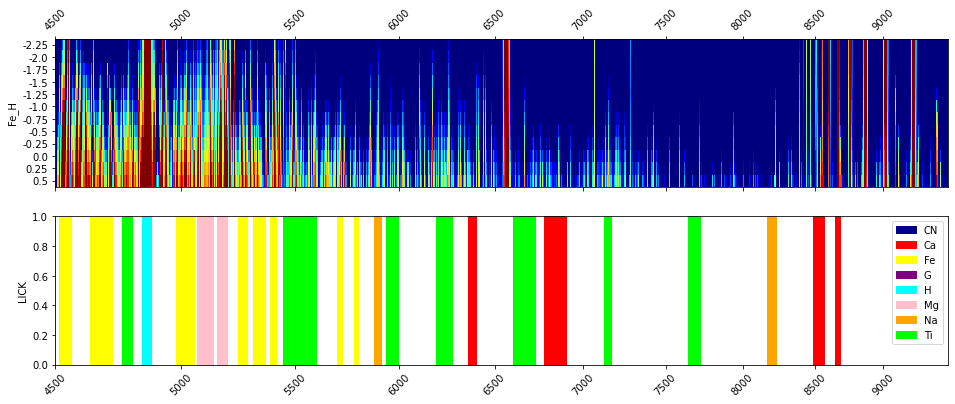

In [696]:
self.plot_Fe_lp()

In [455]:
# df_para00=df_para0[(df_para["Teff"]<=) & (df_para["O_M"]==0)]

In [139]:
HESSIAN_PATH = "/home/swei20/HL/dataset/flux3d_9k.h5"

In [142]:
with h5py.File(HESSIAN_PATH, 'w') as f:
    f.create_dataset('wave', data = wave0, shape = (9000,))
    f.create_dataset('flux3d', data = flux3d0, shape = (14, 66, 11, 9000))   
    f.create_dataset('mask3d', data = mask3d0, shape = (14, 66, 11))         

In [62]:
np.where(T_eff == 10000)

(array([26]),)

In [99]:
mask3d0.shape

(14, 66, 11)

In [397]:
def get_air(vac):  
    fac = (1.0 + 2.735182*10**(-4) + 131.4182 / vac**2 + 2.76249*10**8 / vac**4)
#     print(fac)
    air = vac / fac    
    return np.round(air,2)

def get_lines():
    dBands = {}
    dBands['CN'] = [[4142,4177]]
    dBands['Ca'] = [[3899, 4003], [4222, 4235], [4452, 4475], [8484, 8513],
                    [8522, 8562], [8642, 8682], [6358, 6402], [6775, 6900]]
    dBands['Fe'] = [[4369, 4420], [4514, 4559], [4634, 4720], [4978, 5054], 
                    [5246, 5286], [5312, 5363], [5388, 5415], [5697, 5720],[5777, 5797]]
    dBands['G']  = [[4281, 4316]]
    dBands['H']  = [[4839, 4877], [4084, 4122], [4320, 4364]]
    dBands['Mg'] = [[4761, 4799], [5069, 5134], [5154, 5197]]
    dBands['Na'] = [[8164, 8229], [8180, 8200], [5877, 5909]]
    dBands['Ti'] = [[6190, 6272], [6600, 6723], [5937, 5994], 
                    [7124, 7163], [7643, 7717], [5445, 5600], [4759, 4800]]

    cBands = {}
    cBands['CN'] = 'darkblue'
    cBands['Ca'] = 'red'
    cBands['Fe'] = 'yellow'
    cBands['G']  = 'purple'
    cBands['H']  = 'cyan'
    cBands['Mg'] = 'pink'
    cBands['Na'] = 'orange'
    cBands['Ti'] = 'green'

    return dBands, cBands


In [398]:
dBands, cBands = get_lines()

In [399]:
def plot_lines(dBands, cBands, wave, ax=None):
    ax = ax or plt.subplots(figsize=(20,4))[1]
    prop_cycle = plt.rcParams['axes.prop_cycle']
    color = iter(prop_cycle.by_key()['color'])
    ax.grid(True)
    ax.set_ylim(-1,0)
    l_max = 1
    for idx, (key, vals) in enumerate(dBands.items()):
        for val in vals:
            val_idx = np.digitize(val, wave)
            ax.fill_between(val_idx, -l_max, 0, color = cBands[key], alpha = 0.4, label = key)
#     for idx, (key, vals) in enumerate(lines.items()):
#         ax.vlines(vals, -l_max, 0, color = next(color), label = key, linewidth = 2)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    ax.axhline(0, color = 'k')
    wv_lb = np.array([4000 + 500*i for i in range(12)])
    ax.set_xticks(np.digitize(wv_lb, wave))   
    ax.set_xticklabels(wv_lb)
    ax.set_xlim(0, len(wave))


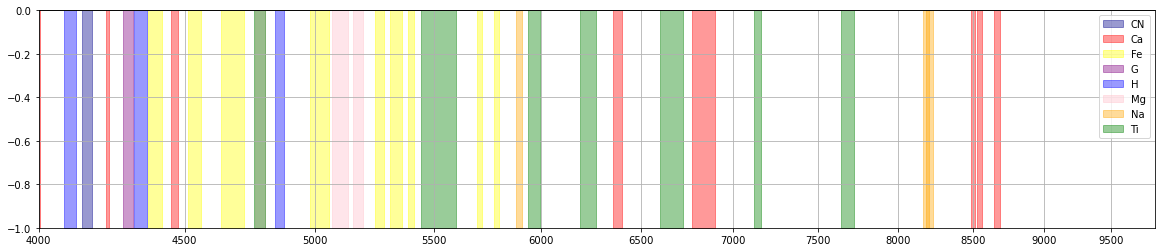

In [371]:
get_lines(dBands, cBands, wave0, ax=None)

<ipython-input-148-1687a348039d>:16: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.matshow(lp3d[flux_id[ii]], norm = LogNorm(), aspect="auto", cmap="jet",vmin =pmin,vmax =pmax)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

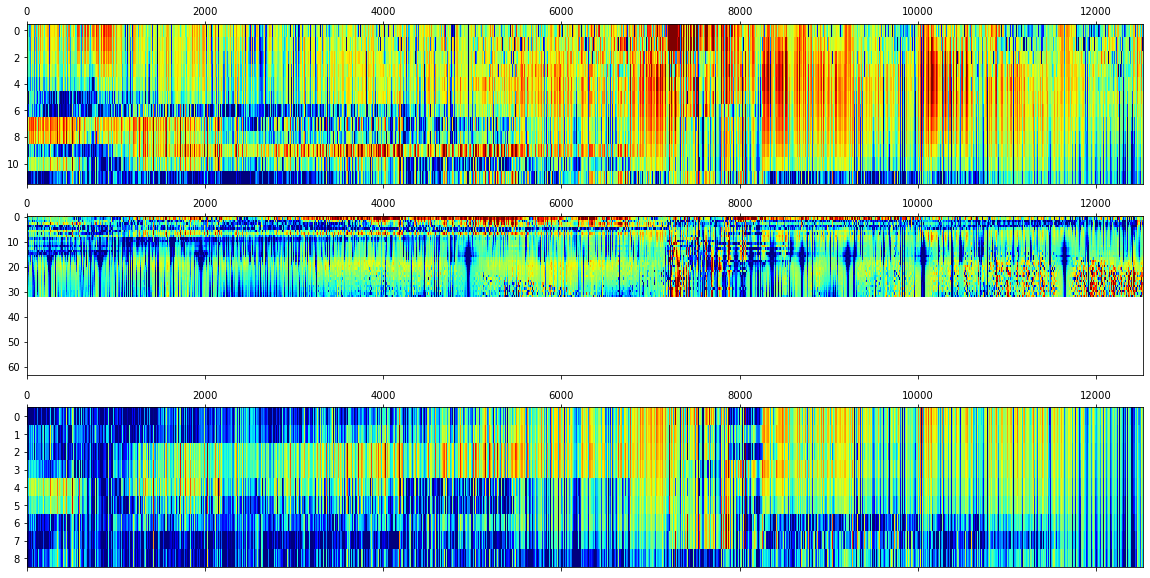

In [179]:
get_lp(Te,Lg,Fe,l)
plt.colorbar()